In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

df = pd.read_csv('C:/Users/kazis/Desktop/CBU/BA Sem 4/DM/taxi-fares.csv')
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2014-06-15 17:11:00.000000107,7.0,2014-06-15 17:11:00 UTC,-73.995420,40.759662,-73.987607,40.751247,1
1,2011-03-14 22:43:00.00000095,4.9,2011-03-14 22:43:00 UTC,-73.993552,40.731110,-73.998497,40.737200,5
2,2011-02-14 15:14:00.00000067,6.1,2011-02-14 15:14:00 UTC,-73.972380,40.749527,-73.990638,40.745328,1
3,2009-10-29 11:29:00.00000040,6.9,2009-10-29 11:29:00 UTC,-73.973703,40.763542,-73.984253,40.758603,5
4,2011-07-02 10:38:00.00000028,10.5,2011-07-02 10:38:00 UTC,-73.921262,40.743615,-73.967383,40.765162,1


In [2]:
df.shape

(55368, 8)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55368 entries, 0 to 55367
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                55368 non-null  object 
 1   fare_amount        55368 non-null  float64
 2   pickup_datetime    55368 non-null  object 
 3   pickup_longitude   55368 non-null  float64
 4   pickup_latitude    55368 non-null  float64
 5   dropoff_longitude  55368 non-null  float64
 6   dropoff_latitude   55368 non-null  float64
 7   passenger_count    55368 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.4+ MB


<AxesSubplot:xlabel='passenger_count', ylabel='count'>

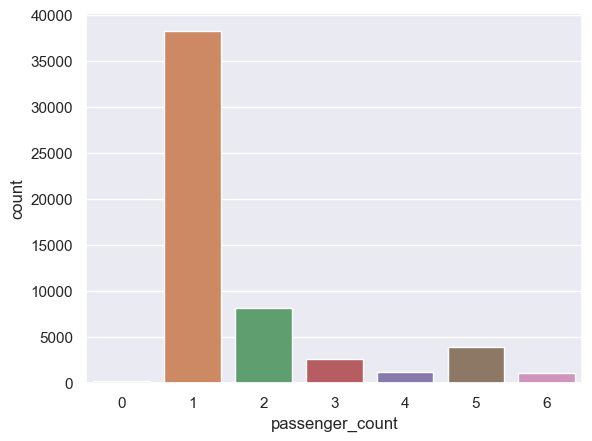

In [4]:
sns.countplot(x=df['passenger_count'])

In [5]:
df = df[df['passenger_count'] == 1]
df = df.drop(['key', 'passenger_count'], axis=1)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,7.0,2014-06-15 17:11:00 UTC,-73.995420,40.759662,-73.987607,40.751247
2,6.1,2011-02-14 15:14:00 UTC,-73.972380,40.749527,-73.990638,40.745328
4,10.5,2011-07-02 10:38:00 UTC,-73.921262,40.743615,-73.967383,40.765162
5,15.3,2011-12-09 20:03:00 UTC,-73.973500,40.792610,-73.936035,40.856548
8,7.7,2011-04-02 01:05:15 UTC,-73.979564,40.735405,-73.955686,40.768065


In [6]:
df.shape

(38233, 6)

In [7]:
corr_matrix = df.corr()
corr_matrix['fare_amount'].sort_values(ascending=False)

fare_amount          1.000000
dropoff_longitude    0.020438
pickup_longitude     0.015742
pickup_latitude     -0.015915
dropoff_latitude    -0.021711
Name: fare_amount, dtype: float64

In [8]:
import datetime
from math import sqrt

for i, row in df.iterrows():
    dt = datetime.datetime.strptime(row['pickup_datetime'], '%Y-%m-%d %H:%M:%S UTC')
    df.at[i, 'day_of_week'] = dt.weekday()
    df.at[i, 'pickup_time'] = dt.hour
    x = (row['dropoff_longitude'] - row['pickup_longitude']) * 54.6 # 1 degree == 54.6 miles
    y = (row['dropoff_latitude'] - row['pickup_latitude']) * 69.0   # 1 degree == 69 miles
    distance = sqrt(x**2 + y**2)
    df.at[i, 'distance'] = distance
    
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_of_week,pickup_time,distance
0,7.0,2014-06-15 17:11:00 UTC,-73.995420,40.759662,-73.987607,40.751247,6.0,17.0,0.720497
2,6.1,2011-02-14 15:14:00 UTC,-73.972380,40.749527,-73.990638,40.745328,0.0,15.0,1.038136
4,10.5,2011-07-02 10:38:00 UTC,-73.921262,40.743615,-73.967383,40.765162,5.0,10.0,2.924341
5,15.3,2011-12-09 20:03:00 UTC,-73.973500,40.792610,-73.936035,40.856548,4.0,20.0,4.862893
8,7.7,2011-04-02 01:05:15 UTC,-73.979564,40.735405,-73.955686,40.768065,5.0,1.0,2.603493


In [9]:
df.drop(columns=['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], inplace=True)
df.head()

,fare_amount,day_of_week,pickup_time,distance
0,7.0,6.0,17.0,0.720497
2,6.1,0.0,15.0,1.038136
4,10.5,5.0,10.0,2.924341
5,15.3,4.0,20.0,4.862893
8,7.7,5.0,1.0,2.603493


In [10]:
corr_matrix = df.corr()
corr_matrix["fare_amount"].sort_values(ascending=False)

fare_amount    1.000000
distance       0.045873
day_of_week    0.009196
pickup_time   -0.019722
Name: fare_amount, dtype: float64

In [11]:
df.describe()

,fare_amount,day_of_week,pickup_time,distance
count,38233.000000,38233.000000,38233.000000,38233.000000
mean,11.214115,2.951534,13.387989,12.018397
std,9.703149,1.932809,6.446519,217.357022
min,-22.100000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,9.000000,0.762116
50%,8.500000,3.000000,14.000000,1.331326
75%,12.500000,5.000000,19.000000,2.402226
max,256.000000,6.000000,23.000000,4923.837280


In [12]:
df = df[(df['distance'] > 1.0) & (df['distance'] < 10.0)]
df = df[(df['fare_amount'] > 0.0) & (df['fare_amount'] < 50.0)]
df.shape

(23298, 4)

In [13]:
corr_matrix = df.corr()
corr_matrix["fare_amount"].sort_values(ascending=False)

fare_amount    1.000000
distance       0.851913
day_of_week   -0.003570
pickup_time   -0.023085
Name: fare_amount, dtype: float64

In [14]:
!pip install lightgbm

In [17]:
from sklearn.model_selection import train_test_split

x = df.drop(['fare_amount'], axis=1)
y = df['fare_amount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import cross_val_score
import lightgbm as lgb

# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
linear_predictions = linear_model.predict(x_test)

linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_rmse = sqrt(mean_squared_error(y_test, linear_predictions))
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

linear_cv_score = cross_val_score(linear_model, x, y, cv=5)

# 2. Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = sqrt(mean_squared_error(y_test, rf_predictions))
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

rf_cv_score = cross_val_score(rf_model, x, y, cv=5)

# 3. Combined Model (Linear Regression and Random Forest)
combined_predictions = (linear_model.predict(x_test) + rf_model.predict(x_test)) / 2

combined_mae = mean_absolute_error(y_test, combined_predictions)
combined_rmse = sqrt(mean_squared_error(y_test, combined_predictions))
combined_mse = mean_squared_error(y_test, combined_predictions)
combined_r2 = r2_score(y_test, combined_predictions)

combined_cv_score = cross_val_score(LinearRegression(), x, y, cv=5)  # Using Linear Regression for cross-validation

# 4. LightGBM
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(x_train, y_train)
lgb_predictions = lgb_model.predict(x_test)

lgb_mae = mean_absolute_error(y_test, lgb_predictions)
lgb_rmse = sqrt(mean_squared_error(y_test, lgb_predictions))
lgb_mse = mean_squared_error(y_test, lgb_predictions)
lgb_r2 = r2_score(y_test, lgb_predictions)

lgb_cv_score = cross_val_score(lgb_model, x, y, cv=5)

# Print results
print("Linear Regression Model Metrics:")
print("MAE:", linear_mae)
print("RMSE:", linear_rmse)
print("MSE:", linear_mse)
print("R-squared:", linear_r2)
print("Cross-validated R-squared score for Linear Regression Model:", linear_cv_score.mean())
print()

print("Random Forest Model Metrics:")
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)
print("MSE:", rf_mse)
print("R-squared:", rf_r2)
print("Cross-validated R-squared score for Random Forest Model:", rf_cv_score.mean())
print()

print("Combined Model Metrics:")
print("MAE:", combined_mae)
print("RMSE:", combined_rmse)
print("MSE:", combined_mse)
print("R-squared:", combined_r2)
print("Cross-validated R-squared score for Combined Model:", combined_cv_score.mean())
print()

print("LightGBM Model Metrics:")
print("MAE:", lgb_mae)
print("RMSE:", lgb_rmse)
print("MSE:", lgb_mse)
print("R-squared:", lgb_r2)
print("Cross-validated R-squared score for LightGBM Model:", lgb_cv_score.mean())


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 18638, number of used features: 3
[LightGBM] [Info] Start training from score 12.629117
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 18638, number of used features: 3
[LightGBM] [Info] Start training from score 12.622274
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,